# `denoising-diffusion-pytorch` Package
While Diffusion models have not yet been democratized to the same degree as other older architectures/approaches in Machine Learning, there are still implementations available for use. The easiest way to use a diffusion model in PyTorch is to use the denoising-diffusion-pytorch package, which implements an image diffusion model like the one discussed in this article. To install the package, simply type the following command in the terminal:

In [1]:
!pip install denoising_diffusion_pytorch

     -------------------------------------- 148.8/148.8 kB 9.2 MB/s eta 0:00:00


## Minimal Example
- To train a model and generate images, we first import the necessary packages:

In [1]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion

c:\Users\t-zhosenie\Anaconda3\envs\personal_project\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
NOTE: Redirects are currently not supported in Windows or MacOs.


- Next, we define our network architecture, in this case a U-Net. The dim parameter specifies the number of feature maps before the first down-sampling, and the dim_mults parameter provides multiplicands for this value and successive down-samplings:

In [2]:
model = Unet(
    dim = 64,
    channels=3,
    dim_mults = (1, 2, 4, 8)
)

- Now that our network architecture is defined, we need to define the diffusion model itself. We pass in the U-Net model that we just defined along with several parameters - the size of images to generate, the number of timesteps in the diffusion process, and a choice between the L1 and L2 norms.

In [6]:
diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

- Now that the diffusion model is defined, it’s time to train. We generate random data to train on, and then train the diffusion model in the usual fashion:

In [7]:
training_images = torch.randn(8, 3, 128, 128)
loss = diffusion(training_images)
loss.backward()

- Once the model is trained, we can finally generate images by using the sample() method of the diffusion object. Here we generate 4 images, which are only noise given that our training data was random:

In [8]:
sampled_images = diffusion.sample(batch_size = 4)

sampling loop time step: 100%|██████████| 10/10 [01:36<00:00,  9.63s/it]


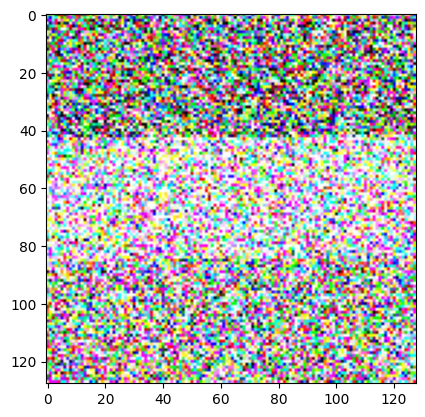

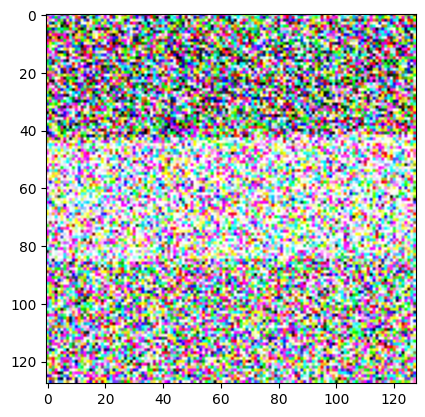

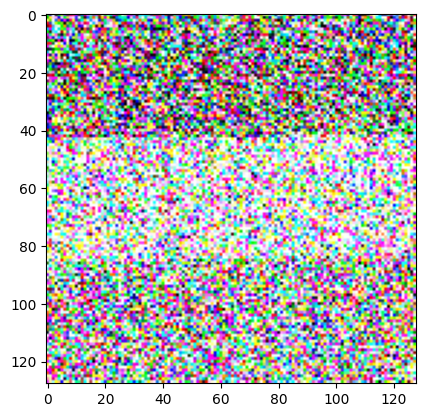

In [9]:
# show a random one
import matplotlib.pylab as plt
%matplotlib inline

image_size = 128
channels = 3
for index in range(0, 3):
    plt.imshow(sampled_images[index].reshape(image_size, image_size, channels))
    plt.show()

## Training on Custom Data
The `denoising-diffusion-pytorch` package also allow you to train a diffusion model on a specific dataset. Simply replace the `'path/to/your/images'` string with the dataset directory path in the `Trainer()` object below, and change `image_size` to the appropriate value. After that, simply run the code to train the model, and then sample as before. Note that PyTorch must be compiled with CUDA enabled in order to use the Trainer class:

In [10]:
from denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer

model = Unet(
    dim = 64,
    channels=3,
    dim_mults = (1, 2, 4, 8)
)

diffusion = GaussianDiffusion(
    model,
    image_size = 64,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

trainer = Trainer(
    diffusion,
    './data/face_data/',
    train_batch_size = 32,
    train_lr = 2e-5,
    train_num_steps = 1000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True,                     # turn on mixed precision
    results_folder='./result_beauty/'
)

trainer.train()

c:\Users\t-zhosenie\Anaconda3\envs\personal_project\lib\site-packages\torch\amp\autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
loss: 0.1698: 100%|██████████| 1000/1000 [14:26:10<00:00, 51.97s/it]  

training complete


In [11]:
sampled_images = diffusion.sample(batch_size = 5)

sampling loop time step: 100%|██████████| 1000/1000 [29:19<00:00,  1.76s/it]


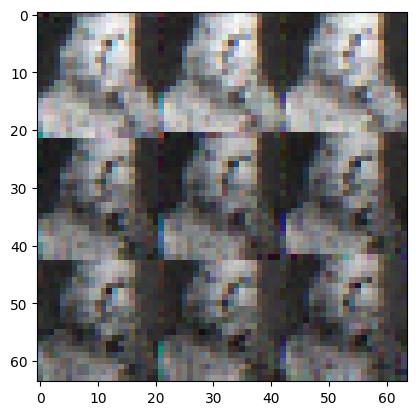

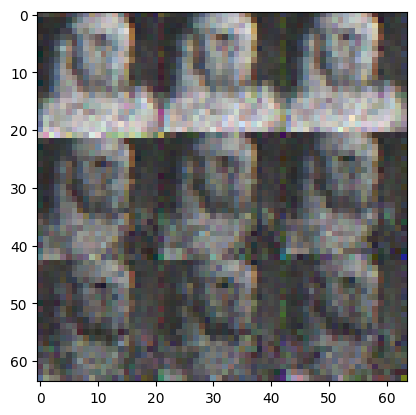

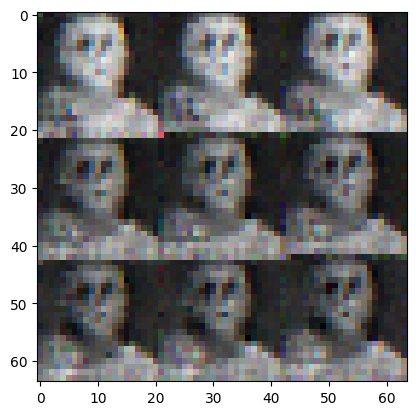

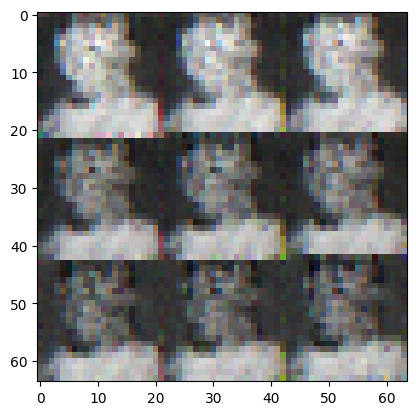

In [16]:
# show a random one
import matplotlib.pylab as plt
%matplotlib inline

image_size = 64
channels = 3
for index in range(0, 4):
    plt.imshow(sampled_images[index].reshape(image_size, image_size, channels))
    plt.show()

# Conclusion
The results looks promising, more training step is needed to obtain a plausible results. Train model with train_num_steps = 700000

MovieWriter ffmpeg unavailable; using Pillow instead.


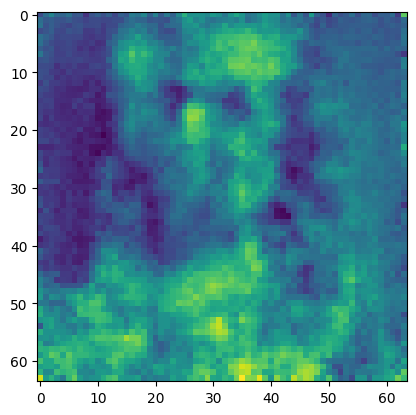

In [13]:
import matplotlib.animation as animation

random_index = 2
timesteps = 5
channels = 1

fig = plt.figure()
ims = []
for i in range(timesteps):
    im = plt.imshow(sampled_images[i][random_index].reshape(image_size, image_size, channels), animated=True)
    ims.append([im])

animate = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
animate.save('diffusion_test.gif')
plt.show()